<a href="https://colab.research.google.com/github/Luanqx/3005project/blob/main/%E2%80%9Chandwrites_(1)_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
data = pd.read_csv("/content/handwrites.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data[data['label']==1]
#data[data['label']==1].shape
#data.shape

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2836,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2841,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2846,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
digit=data[data['label']==0]
digit_train = digit[0:int(len(digit)*.8)]
digit_train = digit_train[digit_train.columns[1:]].T
digit_train.shape

(784, 232)

In [6]:
np.random.seed(seed=2)

def getTrainTest(digit, k):
    digit_train = digit[0:int(len(digit)*.8)]
    digit_train = digit_train.sample(n=k)
    digit_train = digit_train[digit_train.columns[1:]].T
    digit_test = digit[int(len(digit)*.8):]
    digit_test = digit_test[digit_test.columns[1:]]
    return (digit_train,digit_test)

zero = data[data['label']==0]
zero_train,zero_test = getTrainTest(zero,50)
zero_train.shape
print(zero_train.shape)

one = data[data['label']==1]
one_train,one_test = getTrainTest(one,50)
print(one_train.shape)

two = data[data['label']==2]
two_train,two_test = getTrainTest(two,50)
two_train.shape
print(two_train.shape)

three = data[data['label']==3]
three_train,three_test = getTrainTest(three,50)
three_train.shape
print(three_train.shape)

four = data[data['label']==4]
four_train,four_test = getTrainTest(four,50)
four_train.shape
print(four_train.shape)

zero_u,e,zero_v = np.linalg.svd(zero_train,full_matrices=False)
one_u,e,one_v = np.linalg.svd(one_train,full_matrices=False)
two_u,e,two_v = np.linalg.svd(two_train,full_matrices=False)
three_u,e,three_v = np.linalg.svd(three_train,full_matrices=False)
four_u,e,four_v = np.linalg.svd(four_train,full_matrices=False)

(784, 50)
(784, 50)
(784, 50)
(784, 50)
(784, 50)


In [ ]:
print(one_u.shape)
print(e.shape)
print(v.shape)
print(v)
print(zero_v)
print("-----------------------")
print(one_v)

(784, 50)
(50,)
(50, 50)
[[-9.71206152e-02 -1.46410027e-01 -1.37957358e-01 ... -1.88378871e-01
  -1.64705811e-01 -1.06563203e-01]
 [-1.37095963e-01  1.25684477e-01  1.74553441e-01 ...  1.93152144e-01
   1.70847194e-01  2.52926299e-02]
 [ 2.33120370e-02 -2.42190834e-01 -7.42873108e-02 ...  1.81438890e-01
   1.31538298e-01 -2.68104430e-01]
 ...
 [ 1.05041723e-01 -3.21417860e-01 -2.20715921e-01 ... -4.43488191e-02
  -8.17628476e-02  1.96745187e-01]
 [-1.72433949e-02  5.13716231e-01 -1.69881792e-02 ... -6.01240693e-02
   9.31888227e-02 -1.70918550e-01]
 [-4.51732315e-04 -5.23803169e-02  4.41265791e-02 ...  1.87784941e-02
   5.48845454e-02 -4.91981835e-01]]
[[-0.12975726 -0.12038101 -0.13062809 ... -0.13399816 -0.17770407
  -0.10376461]
 [-0.07499497  0.06542712  0.16782205 ...  0.20600784  0.09464448
  -0.14189716]
 [ 0.23086234  0.19115982 -0.04083803 ... -0.06338186 -0.11067926
  -0.16482927]
 ...
 [-0.09586119  0.07547441 -0.01055859 ...  0.1206937  -0.10655843
   0.05172591]
 [ 0.09891

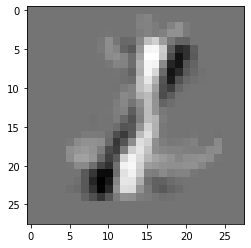

In [ ]:
tmp=np.zeros((28,28))
for i in range(4):
    tmp+=one_u[:,i].reshape(28,28)#first 5 columns of U
    
plt.imshow(tmp,cmap='Greys')#first 5 columns of U
plt.show()

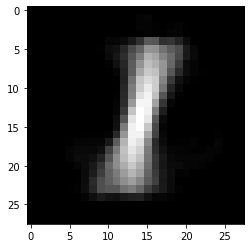

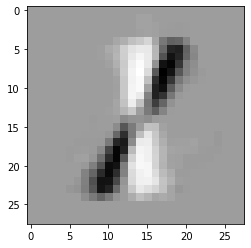

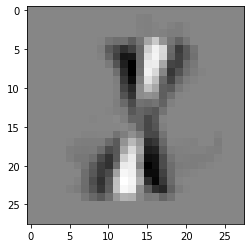

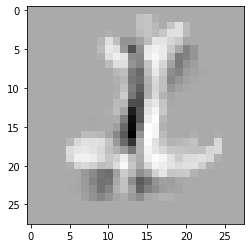

In [ ]:
for i in range(4):
    plt.imshow(one_u[:,i].reshape(28,28),cmap='Greys')#first 5 columns of U
    plt.show()

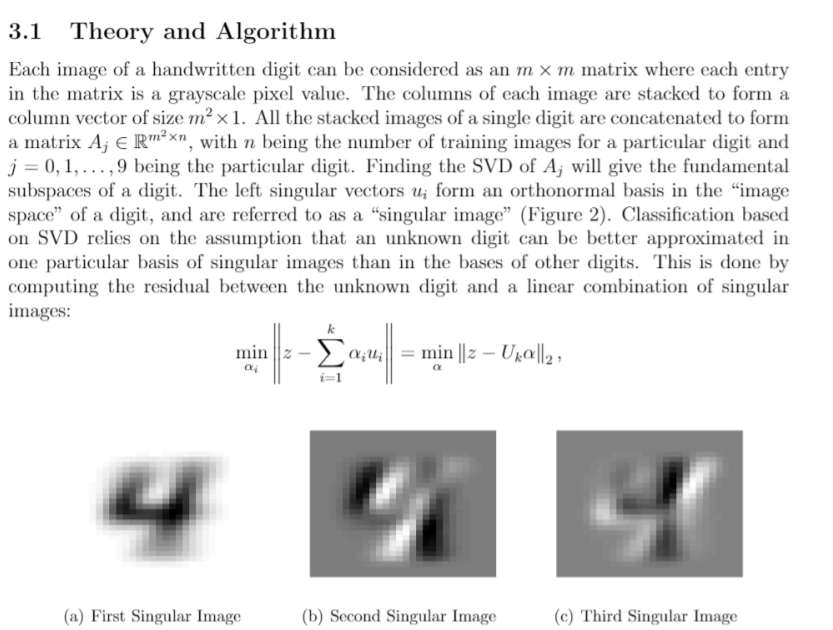

In [10]:
def classifyUnknownDigit(newDigit):
    classes = [zero_u,one_u,two_u,three_u,four_u]
    values = []
    for U in classes:
        values.append(np.linalg.norm((np.identity(len(U))-np.matrix(U)*np.matrix(U.T)).dot(newDigit),ord=2)/np.linalg.norm(newDigit,ord=2))
    return values.index(min(values))
    
zero_pred = []
one_pred = []
two_pred = []
three_pred = []
four_pred = []
for i in range(len(four_test)):
    four_pred.append(classifyUnknownDigit(four_test.iloc[i]))
for i in range(len(zero_test)):
    zero_pred.append(classifyUnknownDigit(zero_test.iloc[i]))
for i in range(len(two_test)):
    two_pred.append(classifyUnknownDigit(two_test.iloc[i]))
for i in range(len(one_test)):
    one_pred.append(classifyUnknownDigit(one_test.iloc[i]))
for i in range(len(three_test)):
    three_pred.append(classifyUnknownDigit(three_test.iloc[i]))
    
print ("Accuracy")
print ("------------")
print (zero_pred.count(0)/1.0/len(zero_pred)) #count the number of 0's, divide by length of list to get accuracy.) 
print (one_pred.count(1)/1.0/len(one_pred))
print (two_pred.count(2)/1.0/len(two_pred))
print (three_pred.count(3)/1.0/len(three_pred))

Accuracy
------------
0.9827586206896551
1.0
0.953125
0.98
